The curve number method is a simple empirical method to approximate the amount of runoff from rainfall events. The method was developed by the US Department of Agriculture Soil Conservation Service based on observed runoff values from field experiments.

Curve numbers range from 0 to 100, where higher numbers represent more runoff. For instance, a completely impervious surface like a paved parking lot or a house roof would receive a curve number of 100. The curve number of agricultural fields typically ranges from 60 to 90, depending on the slope, vegetation cover, tillage, and soil physical properties associated to water infiltration and hydraulic conductivity.

For instance, a field planted with a small grain crop (e.g., wheat, oats, barley) that has abundant surface stubble, presence of terraces, and was planted following elevation contours on a well-structured soil would have a curve number of about 60.

Visit [this link](https://www.wikiwand.com/en/Runoff_curve_number) to learn more about the curve number method.


In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Define cure number function
def curve_number(P, CN=75):
    """
    Curve number method proposed by the Soil Conservation Service
    P is precipitation in milimeters
    CN is the curve number
    """
    runoff = np.zeros_like(P)
    
    S02 = 1000/CN - 10;
    S005 = 1.33 * S02**1.15;
    Lambda = 0.05; # Hawkins, 2002.
    Ia = S005 * Lambda; # Initial abstraction (Ia). Rainfall before runoff starts to occur.
    idx = P > Ia
    runoff[idx] = (P[idx] - Ia)**2 / (P[idx] - Ia + S005);

    return runoff


In [3]:
# Test function
curve_number(np.array([2]),100)

array([2])

In [5]:
# Load data from Acme, OK
df = pd.read_csv('../datasets/acme_ok_daily.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y %H:%M')
df['RAIN'].fillna(0)
df.head()

,Date,DOY,TMAX,TMIN,RAIN,HMAX,HMIN,ATOT,W2AVG,ETgrass
0,2005-01-01,1,21.161111,14.272222,0.00,97.5,65.97,4.09,5.194592,1.976940
1,2005-01-02,2,21.261111,4.794444,0.00,99.3,77.37,4.11,3.428788,1.302427
2,2005-01-03,3,5.855556,3.477778,2.54,99.8,98.20,2.98,3.249973,0.349413
3,2005-01-04,4,4.644444,0.883333,7.62,99.6,98.50,1.21,3.527137,0.288802
4,2005-01-05,5,0.827778,-9.172222,24.13,99.4,86.80,1.65,NaN,0.367956


In [6]:
# Select a specific year to study runoff
idx_year = df['Date'].dt.year == 2007
df = df[idx_year].reset_index(drop=True) # drop=True prevents adding the old index to the new df.
df.head()


,Date,DOY,TMAX,TMIN,RAIN,HMAX,HMIN,ATOT,W2AVG,ETgrass
0,2007-01-01,1,9.111111,-4.533333,0.000,91.0,23.25,12.93,2.096612,1.602857
1,2007-01-02,2,10.122222,-6.900000,0.000,95.2,25.79,11.35,0.965604,1.106730
2,2007-01-03,3,12.322222,0.394444,0.000,80.1,45.66,8.40,3.741716,2.007247
3,2007-01-04,4,9.922222,5.388889,2.032,97.8,68.65,3.68,3.504785,1.047221
4,2007-01-05,5,12.450000,5.194444,0.000,98.2,68.39,6.15,3.862416,1.238152


In [7]:
# Compute cumulative rainfall
df['RAIN_SUM'] = df['RAIN'].cumsum()

# Compute cumulative runoff
df['RUNOFF'] = curve_number(df['RAIN']/25.4,CN=80)*25.4
df['RUNOFF_SUM'] = df['RUNOFF'].cumsum()

# Check Dataframe
df.head()

,Date,DOY,TMAX,TMIN,RAIN,HMAX,HMIN,ATOT,W2AVG,ETgrass,RAIN_SUM,RUNOFF,RUNOFF_SUM
0,2007-01-01,1,9.111111,-4.533333,0.000,91.0,23.25,12.93,2.096612,1.602857,0.000,0.0,0.0
1,2007-01-02,2,10.122222,-6.900000,0.000,95.2,25.79,11.35,0.965604,1.106730,0.000,0.0,0.0
2,2007-01-03,3,12.322222,0.394444,0.000,80.1,45.66,8.40,3.741716,2.007247,0.000,0.0,0.0
3,2007-01-04,4,9.922222,5.388889,2.032,97.8,68.65,3.68,3.504785,1.047221,2.032,0.0,0.0
4,2007-01-05,5,12.450000,5.194444,0.000,98.2,68.39,6.15,3.862416,1.238152,2.032,0.0,0.0


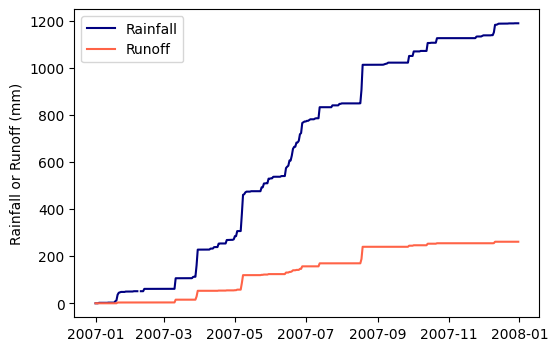

In [11]:
# Plot cumulative rainfall and runoff

plt.figure(figsize=(6,4))
plt.plot(df['Date'], df['RAIN_SUM'], color='navy', label='Rainfall')
plt.plot(df['Date'], df['RUNOFF_SUM'], color='tomato', label='Runoff')
plt.ylabel('Rainfall or Runoff (mm)')
plt.legend()
plt.show()


In [12]:
print('Annual precipitation = ', df['RAIN_SUM'].iloc[-1].round(),' mm')
print('Annual runoff = ',df['RUNOFF_SUM'].iloc[-1].round(),' mm')

Annual precipitation =  1190.0  mm
Annual runoff =  262.0  mm


## Practice

- Using precipitation observations for 2007, what is the total runoff for a fallow under bare soil for a soil with hydrologic condition D?

- Select a year in which the total runoff is lower than for 2007. Use a curve number of 80.

- Modify the curve number function so that it works with precipitation data in both inches and millimeters.

## References

Ponce, V.M. and Hawkins, R.H., 1996. Runoff curve number: Has it reached maturity?. Journal of hydrologic engineering, 1(1), pp.11-19.